# Projet transversal 5
### Prédiction de la qualité de l'air

Le script commence par importer les bibliothèques nécessaires : pandas pour la manipulation de données, matplotlib pour la visualisation de données, sklearn pour l’apprentissage automatique et numpy pour les opérations numériques.

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Les données sont ensuite chargées à partir d’un fichier Excel en utilisant la fonction read_excel() de pandas.

In [113]:
# Chargement des données
data = pd.read_excel("C:\\Users\\DELL\\Downloads\\POSTE 5 NIAGUE PEULH 1.xlsx")
data

,TimeStamp,Total Particles (ug/m^3),PM10 particles (ug/m^3),PM2.5 particles (ug/m^3),PM1 particles (ug/m^3)
0,2021-10-30 13:28:18,61.7,34.1,7.73,2.06
1,2021-10-30 13:29:18,22.7,10.6,4.51,1.78
2,2021-10-30 13:30:18,56.5,25.1,4.27,1.53
3,2021-10-30 13:31:18,7.4,4.9,3.56,1.44
4,2021-10-30 13:32:18,20.1,13.6,3.98,1.36
...,...,...,...,...,...
1475,2021-10-31 14:03:18,5.5,3.5,2.28,0.91
1476,2021-10-31 14:04:18,6.3,4.4,2.45,1.02
1477,2021-10-31 14:05:18,7.3,4.2,2.54,1.01
1478,2021-10-31 14:06:18,6.6,4.3,2.46,1.00


La colonne TimeStamp est convertie en plusieurs colonnes pour l’année, le mois, le jour, l’heure, la minute et la seconde en utilisant l’attribut dt de pandas. Cette opération est effectuée en vue de conserver une uniformité de type des données utilisées pour l'apprentissage du modèle de régression. 

La fonction head() est utilisée pour afficher les premières lignes de données pour vérifier qu’elles ont été chargées correctement.
On retrouve ainsi en sortie la nouvelle version du dataframe.

In [114]:
# Extraction des caractéristiques temporelles
data['annee'] = data['TimeStamp'].dt.year
data['mois'] = data['TimeStamp'].dt.month
data['jour'] = data['TimeStamp'].dt.day
data['heure'] = data['TimeStamp'].dt.hour
data['minute'] = data['TimeStamp'].dt.minute
data['seconde'] = data['TimeStamp'].dt.second

# Affichage des premières lignes pour vérification
data.head()


,TimeStamp,Total Particles (ug/m^3),PM10 particles (ug/m^3),PM2.5 particles (ug/m^3),PM1 particles (ug/m^3),annee,mois,jour,heure,minute,seconde
0,2021-10-30 13:28:18,61.7,34.1,7.73,2.06,2021,10,30,13,28,18
1,2021-10-30 13:29:18,22.7,10.6,4.51,1.78,2021,10,30,13,29,18
2,2021-10-30 13:30:18,56.5,25.1,4.27,1.53,2021,10,30,13,30,18
3,2021-10-30 13:31:18,7.4,4.9,3.56,1.44,2021,10,30,13,31,18
4,2021-10-30 13:32:18,20.1,13.6,3.98,1.36,2021,10,30,13,32,18


Les données sont nettoyées et prétraitées comme nécessaire, telles que la suppression des lignes manquantes ou l'imputation de valeurs manquantes.
On entend par "Variables explicatives" les caractéristiques (explications ou données d'explication) prises en compte pour l'entrainement.
Les caractéristiques et les cibles sont séparées en deux ensembles de données distincts. Par exemple, pour le modèle de régression linéaire PM10, devant prédire la quantité de polluant PM10, les caractéristiques sont stockées dans la variable X_pm10 et la cible est stockée dans la variable y_pm10.
Et il en est de même pour les autres polluants PM2.5 et PM1

Les modèles de régression linéaire sont créés en instanciant la classe LinearRegression de sklearn.linear_model. Par exemple, model_pm10 = LinearRegression() crée un modèle de régression linéaire pour prédire la concentration de particules PM10.
Les modèles de régression linéaire sont formés sur les données d'explication à l'aide de la méthode fit(). Par exemple, model_pm10.fit(X_pm10, y_pm10) forme le modèle de régression linéaire PM10 sur les données d'explication X_pm10 et la cible y_pm10.

Nous utilisons ce modèle ci pour faire des prédictions sur les données d'explication à l'aide de la méthode predict(). Par exemple, y_pred_pm10 = model_pm10.predict(X_pm10) utilise le modèle de régression linéaire PM10 pour faire des prédictions sur les données d'explication X_pm10 et stocke les prédictions dans la variable y_pred_pm10.
Les valeurs prédites sont ensuite ajoutées aux données d'origine en tant que nouvelles colonnes.

In [115]:
# Variables explicatives pour PM10
X_pm10 = data.drop(columns=['PM10 particles (ug/m^3)','PM2.5 particles (ug/m^3)','PM1 particles (ug/m^3)', 'TimeStamp']) #annee, mois, jour, heure, minute seconde et Total Particles (ug/m^3)

# Les 'PM10 particles (ug/m^3)' seront la cible du modèle
y_pm10 = data['PM10 particles (ug/m^3)']

# Création du modèle de régression linéaire pour PM10
model_pm10 = LinearRegression()

# Entraînement du modèle pour PM10
model_pm10.fit(X_pm10, y_pm10)

# Variables explicatives pour PM2.5
X_pm25 = data.drop(columns=['PM10 particles (ug/m^3)','PM2.5 particles (ug/m^3)','PM1 particles (ug/m^3)','TimeStamp']) #annee, mois, jour, heure, minute seconde et Total Particles (ug/m^3)

# Les 'PM2.5 particles (ug/m^3)' seront la cible du modèle
y_pm25 = data['PM2.5 particles (ug/m^3)']

# Création du modèle de régression linéaire pour PM2.5
model_pm25 = LinearRegression()

# Entraînement du modèle pour PM2.5
model_pm25.fit(X_pm25, y_pm25)

# Variables explicatives pour PM1
X_pm1 = data.drop(columns=['PM10 particles (ug/m^3)','PM2.5 particles (ug/m^3)','PM1 particles (ug/m^3)','TimeStamp']) #annee, mois, jour, heure, minute seconde et Total Particles (ug/m^3)

# Les 'PM1 particles (ug/m^3)' seront la cible du modèle
y_pm1 = data['PM1 particles (ug/m^3)']

# Création du modèle de régression linéaire pour PM1
model_pm1 = LinearRegression()

# Entraînement du modèle pour PM1
model_pm1.fit(X_pm1, y_pm1)

# Prédiction sur chacunes des données existantes
y_pred_pm10 = model_pm10.predict(X_pm10)
y_pred_pm25 = model_pm25.predict(X_pm25)
y_pred_pm1 = model_pm1.predict(X_pm1)

# Ajouter des nouvelles colonnes avec les prédictions pour PM10, PM2.5 et PM1 aux données existantes
data['Predicted PM10 particles (ug/m^3)'] = y_pred_pm10
data['Predicted PM2.5 particles (ug/m^3)'] = y_pred_pm25
data['Predicted PM1 particles (ug/m^3)'] = y_pred_pm1

data.head()

,TimeStamp,Total Particles (ug/m^3),PM10 particles (ug/m^3),PM2.5 particles (ug/m^3),PM1 particles (ug/m^3),annee,mois,jour,heure,minute,seconde,Predicted PM10 particles (ug/m^3),Predicted PM2.5 particles (ug/m^3),Predicted PM1 particles (ug/m^3)
0,2021-10-30 13:28:18,61.7,34.1,7.73,2.06,2021,10,30,13,28,18,33.801664,10.250767,3.387734
1,2021-10-30 13:29:18,22.7,10.6,4.51,1.78,2021,10,30,13,29,18,13.013134,4.877144,1.924593
2,2021-10-30 13:30:18,56.5,25.1,4.27,1.53,2021,10,30,13,30,18,31.027727,9.538594,3.195636
3,2021-10-30 13:31:18,7.4,4.9,3.56,1.44,2021,10,30,13,31,18,4.855796,2.772742,1.353165
4,2021-10-30 13:32:18,20.1,13.6,3.98,1.36,2021,10,30,13,32,18,11.623880,4.525675,1.831745


Les métriques de performance du modèle sont calculées en utilisant les fonctions mean_absolute_error(), mean_squared_error(), mean_squared_error(..., squared=False) et r2_score() du module sklearn.metrics.

L'erreur absolue moyenne (MAE)représente la moyenne des valeurs absolues des écarts entre les prédictions du modèle et les vraies valeurs. Une valeur faible du MAE indique un meilleur ajustement du modèle aux données, car cela signifie que les prédictions du modèle sont en moyenne plus proches des vraies valeurs. 

L'erreur quadratique moyenne (MSE) est la moyenne des carrés des écarts entre les prédictions du modèle et les vraies valeurs. Une valeur faible de celui-ci indique également un meilleur ajustement du modèle aux données.

L'erreur quadratique moyenne racine (RMSE) est simplement la racine carrée du MSE. Il fournit une mesure de l'erreur moyenne dans les mêmes unités que les données originales. Une valeur faible de RMSE indique un meilleur ajustement du modèle aux données, tout comme pour le MAE et le MSE.

Le score R² est le coefficient de détermination,qui mesure la proportion de la variance de la variable dépendante qui est expliquée par la variable indépendante dans le modèle.
coefficient de détermination mesure la proportion de la variance de la variable dépendante qui est expliquée par la variable indépendante dans le modèle.
Il indique à quel point les données s'ajustent au modèle. Plus il est proche de 1, meilleur est l'ajustement. Et vis-versa, plus il est proche de 0, moins il explique toute la variance.


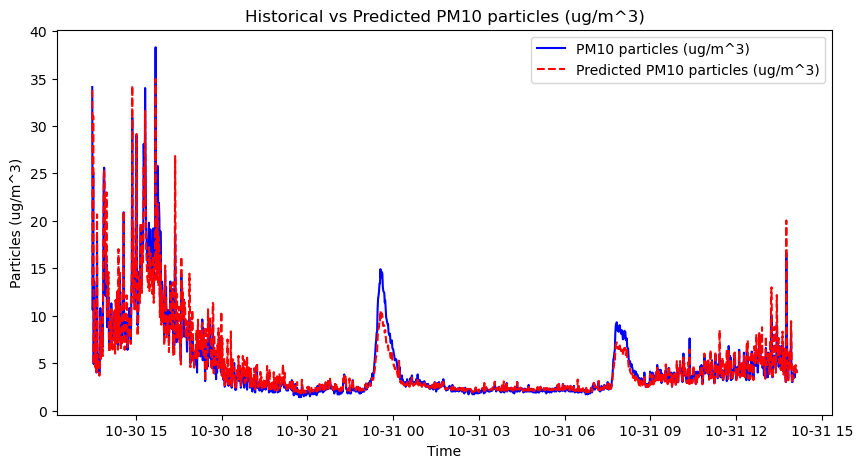

Performance du modèle pour PM10 :

Erreur absolue moyenne (MAE) : 0.5737286906944855
Erreur quadratique moyenne (MSE) : 1.1357245704031784
Racine carrée de l'erreur quadratique moyenne (RMSE) : 1.0657037911179534
Coefficient de détermination (R²) : 0.9360352370514783



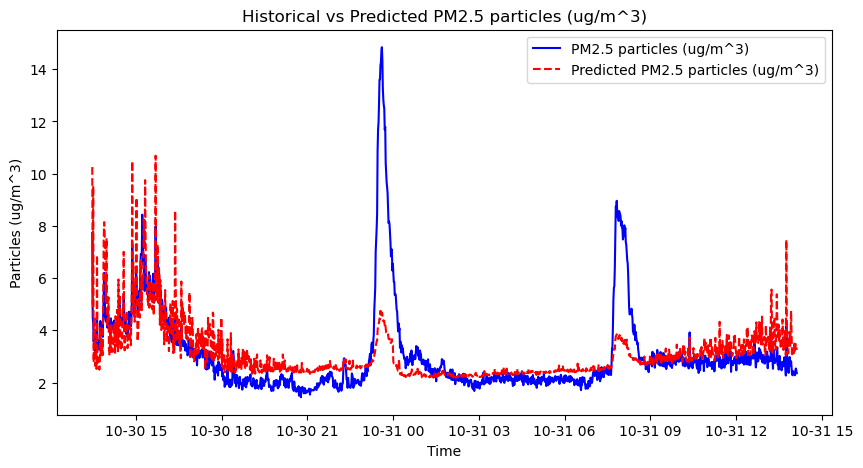

Performance du modèle pour PM2.5 :

Erreur absolue moyenne (MAE) : 0.7582905552604488
Erreur quadratique moyenne (MSE) : 2.009691016086363
Racine carrée de l'erreur quadratique moyenne (RMSE) : 1.4176357134632165
Coefficient de détermination (R²) : 0.34131255679218764



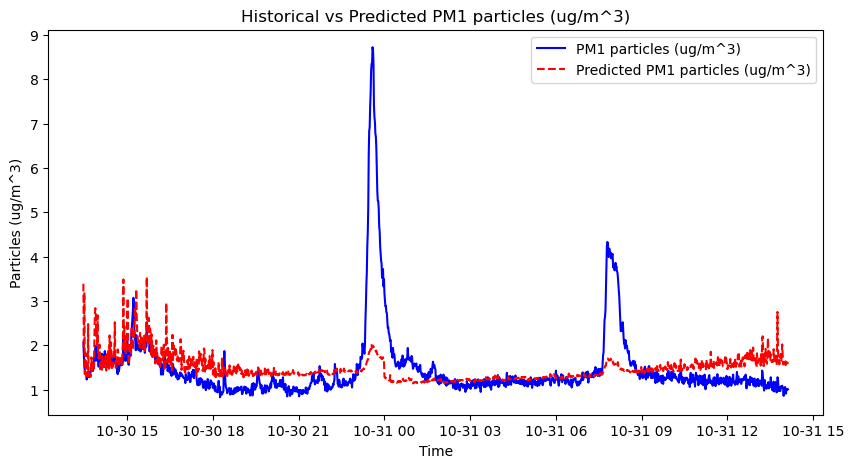

Performances du modèle pour PM1 :

Erreur absolue moyenne (MAE) : 0.41738729685552756
Erreur quadratique moyenne (MSE) : 0.6981148386955074
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.8355326676411327
Coefficient de détermination (R²) : 0.10634877737374548


In [116]:
# Visualisation des données existantes et des prédictions pour PM10
plt.figure(figsize=(10, 5))
plt.plot(data['TimeStamp'], data['PM10 particles (ug/m^3)'], label='PM10 particles (ug/m^3)', color='blue')
plt.plot(data['TimeStamp'], data['Predicted PM10 particles (ug/m^3)'], label='Predicted PM10 particles (ug/m^3)', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Particles (ug/m^3)')
plt.title('Historical vs Predicted PM10 particles (ug/m^3)')
plt.legend()
plt.show()

# Calcul des métriques pour PM10
mae_pm10 = mean_absolute_error(y_pm10, y_pred_pm10)
mse_pm10 = mean_squared_error(y_pm10, y_pred_pm10)
rmse_pm10 = mean_squared_error(y_pm10, y_pred_pm10, squared=False)
r2_pm10 = r2_score(y_pm10, y_pred_pm10)

print("Performance du modèle pour PM10 :")
print()
print("Erreur absolue moyenne (MAE) :", mae_pm10)
print("Erreur quadratique moyenne (MSE) :", mse_pm10)
print("Racine carrée de l'erreur quadratique moyenne (RMSE) :", rmse_pm10)
print("Coefficient de détermination (R²) :", r2_pm10)
print()


# Visualisation des données existantes et des prédictions pour PM2.5
plt.figure(figsize=(10, 5))
plt.plot(data['TimeStamp'], data['PM2.5 particles (ug/m^3)'], label='PM2.5 particles (ug/m^3)', color='blue')
plt.plot(data['TimeStamp'], data['Predicted PM2.5 particles (ug/m^3)'], label='Predicted PM2.5 particles (ug/m^3)', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Particles (ug/m^3)')
plt.title('Historical vs Predicted PM2.5 particles (ug/m^3)')
plt.legend()
plt.show()

# Calcul des métriques pour PM2.5
mae_pm25 = mean_absolute_error(y_pm25, y_pred_pm25)
mse_pm25 = mean_squared_error(y_pm25, y_pred_pm25)
rmse_pm25 = mean_squared_error(y_pm25, y_pred_pm25, squared=False)
r2_pm25 = r2_score(y_pm25, y_pred_pm25)

print("Performance du modèle pour PM2.5 :")
print()
print("Erreur absolue moyenne (MAE) :", mae_pm25)
print("Erreur quadratique moyenne (MSE) :", mse_pm25)
print("Racine carrée de l'erreur quadratique moyenne (RMSE) :", rmse_pm25)
print("Coefficient de détermination (R²) :", r2_pm25)
print()

# Visualisation des données existantes et des prédictions pour PM1
plt.figure(figsize=(10, 5))
plt.plot(data['TimeStamp'], data['PM1 particles (ug/m^3)'], label='PM1 particles (ug/m^3)', color='blue')
plt.plot(data['TimeStamp'], data['Predicted PM1 particles (ug/m^3)'], label='Predicted PM1 particles (ug/m^3)', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Particles (ug/m^3)')
plt.title('Historical vs Predicted PM1 particles (ug/m^3)')
plt.legend()
plt.show()

# Calcul des métriques pour PM1
mae_pm1 = mean_absolute_error(y_pm1, y_pred_pm1)
mse_pm1 = mean_squared_error(y_pm1, y_pred_pm1)
rmse_pm1 = mean_squared_error(y_pm1, y_pred_pm1, squared=False)
r2_pm1 = r2_score(y_pm1, y_pred_pm1)

print("Performances du modèle pour PM1 :")
print()
print("Erreur absolue moyenne (MAE) :", mae_pm1)
print("Erreur quadratique moyenne (MSE) :", mse_pm1)
print("Racine carrée de l'erreur quadratique moyenne (RMSE) :", rmse_pm1)
print("Coefficient de détermination (R²) :", r2_pm1)

Nous voyons enfin que les graphiques montrent bien le graphe de la variation des valeurs réelles pour chaque polluant présent. Ce dernier est assez similaire au graphe de variation des valeurs prédites.
Les grandes différences indiquent une anormalité. 